# Differentiation and Gradient

For a given function, $y = f(x)$, differentiation of the function provides the velocity of change at a particular point (assuming $f(x)$ is differentiable at the point $x$). Differentiating a function once is called the first-order derivative and denoted $y' = f'(x)$. You will also see other notations denoting the first-order derivative.

- $y' = f'(x)$
- $\dfrac{\mathrm{d} y}{\mathrm{d} x} = \dfrac{\mathrm{d} f(x)}{\mathrm{d} x}$
- $y' = \nabla f(x)$

The value of the derivative at a particular point describes the slope of the line tangent to that point.

The second-order derivative is denoted as follows and provides the acceleration of change at a particular point.

- $y'' = f''(x)$
- $\dfrac{\mathrm{d}^2 y}{\mathrm{d} x^2} = \dfrac{\mathrm{d}^2 f(x)}{\mathrm{d} x^2}$
- $y' = \nabla^2 f(x)$

Being able to compute the derivative of a function and using it to evaluate the rate of change at a particular point is useful for optimization problems (eg finding the global minimum typically equates to finding a point whose tangent line has a slope of zero).

When there are more than one input variable, the gradient generalizes differentiation for the multivariable case. For example, assume we have the following function.

- $y = x_0^2 + x_1^2$

We would like to know how $y$ changes with respect to $x_0$, $\dfrac{\partial y}{\partial x_0}$, and also with respect to $x_1$, $\dfrac{\partial y}{\partial x_1}$.

- $\dfrac{\partial y}{\partial x_0} = 2 x_0$
- $\dfrac{\partial y}{\partial x_1} = 2 x_1$

The second order partial derivatives would look like the following.

- $\dfrac{\partial^2 y}{\partial x_0^2} = 2$
- $\dfrac{\partial^2 y}{\partial x_1^2} = 2$

Let's have fun and try to compute the first and second order derivatives for some functions. We will use [numdifftools](https://numdifftools.readthedocs.io/en/latest/) to evaluate the derivatives and gradients of the following functions.

- $y = f(x) = x^2$
- $y = f(x) = \sin(x)$
- $y = f(x) = e^{-x}$
- $y = f(x) = \tanh(x)$
- $y = f(x_0, x_1) = \sin \left( \sqrt{x_0^2 + x_1^2} \right)$

## $y = f(x) = x^2$

This function is a parabola. As you can see, $y'$ slopes up while $y''$ is constant.

In [1]:
import pandas as pd
import numpy as np
import numdifftools as nd
import matplotlib.pyplot as plt

def get_derivatives(f, x_min=-10, x_max=10, x_step=0.01):
    return pd.DataFrame({'x': np.arange(x_min, x_max + x_step, x_step)}) \
        .assign(**{
            "y": lambda d: f(d['x']),
            "y'": lambda d: nd.Derivative(f, n=1)(d['x']),
            "y''": lambda d: nd.Derivative(f, n=2)(d['x'])
        })

def plot_derivatives(df):
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))

    df \
        .set_index(['x'])['y'] \
        .plot(kind='line', ax=ax[0], ylabel='y', title=r'$y = f(x)$')
    
    df \
        .set_index(['x'])[["y'", "y''"]] \
        .plot(kind='line', ax=ax[1], title=r"$y'$ and $y''$")

    fig.tight_layout()

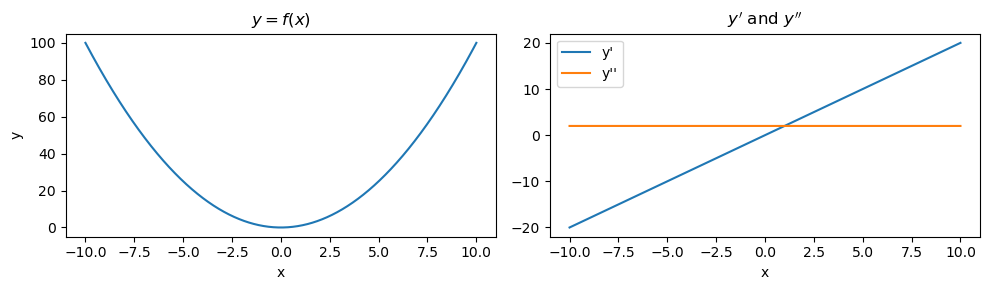

In [2]:
_temp = get_derivatives(lambda x: x ** 2)
plot_derivatives(_temp)

## $y = f(x) = \sin(x)$

This function is a sine wave. As you can see $y'$ and $y''$ are also sinusoidal and nearly out of phase.

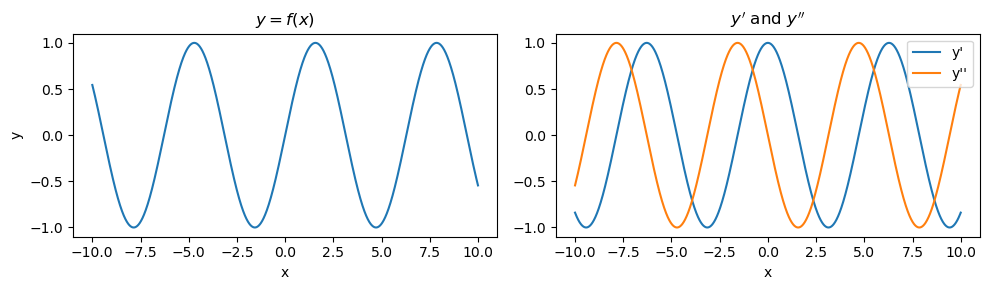

In [180]:
_temp = get_derivatives(lambda x: np.sin(x))
plot_derivatives(_temp)

## $y = f(x) = e^{-x}$

This function is an exponential function. Note that $y'$ increases exponentially and $y''$ decreases exponentially.

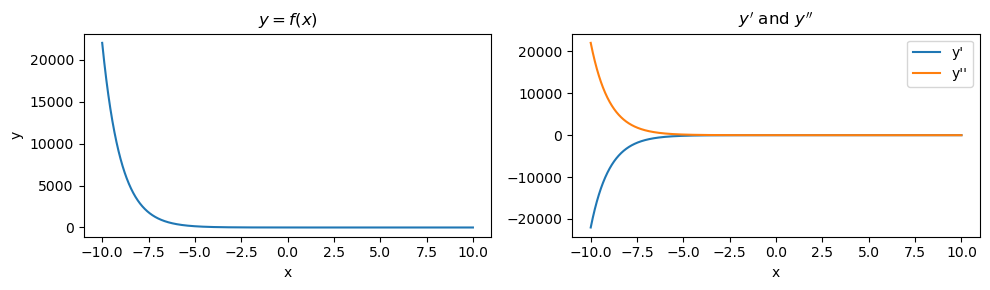

In [4]:
_temp = get_derivatives(lambda x: np.exp(-x))
plot_derivatives(_temp)

## $y = f(x) = \tanh(x)$

This function is the hyperbolic tangent function. For a certain range, $y'$ and $y''$ go in opposite ways.

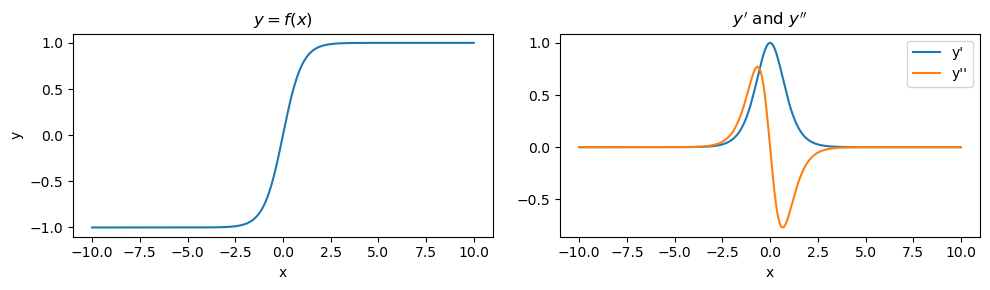

In [5]:
_temp = get_derivatives(lambda x: np.tanh(x))
plot_derivatives(_temp)

## $y = f(x_0, x_1) = \sin \left( \sqrt{x_0^2 + x_1^2} \right)$

At last, we are at a multivariable function. To visualize the gradients, we will use gradient field visualizations as below.

In [124]:
f = lambda x: np.sin(np.sqrt(np.power(x[0], 2.0) + np.power(x[1], 2.0)))
f1 = nd.Gradient(f, n=1)
f2 = nd.Gradient(f, n=2)

x0, x1 = np.meshgrid(np.arange(-5, 5.1, 0.1), np.arange(-5, 5.1, 0.1))
print(f'{x0.shape=}, {x1.shape=}')

x0, x1 = np.ravel(x0), np.ravel(x1)
print(f'{x0.shape=}, {x1.shape=}')

_df = pd.DataFrame({
    'x0': x0, 
    'x1': x1
    }) \
    .assign(**{
        'y': lambda d: d.apply(f, axis=1),
        "y'": lambda d: d[['x0', 'x1']].apply(lambda r: f1(r), axis=1),
        "y''": lambda d: d[['x0', 'x1']].apply(lambda r: f2(r), axis=1),
        'g10': lambda d: d[["y'"]].apply(lambda r: r[0][0], axis=1),
        'g11': lambda d: d[["y'"]].apply(lambda r: r[0][1], axis=1),
        'g20': lambda d: d[["y''"]].apply(lambda r: r[0][0], axis=1),
        'g21': lambda d: d[["y''"]].apply(lambda r: r[0][1], axis=1)
    }) \
    .drop(columns=["y'", "y''"])

x0.shape=(101, 101), x1.shape=(101, 101)
x0.shape=(10201,), x1.shape=(10201,)


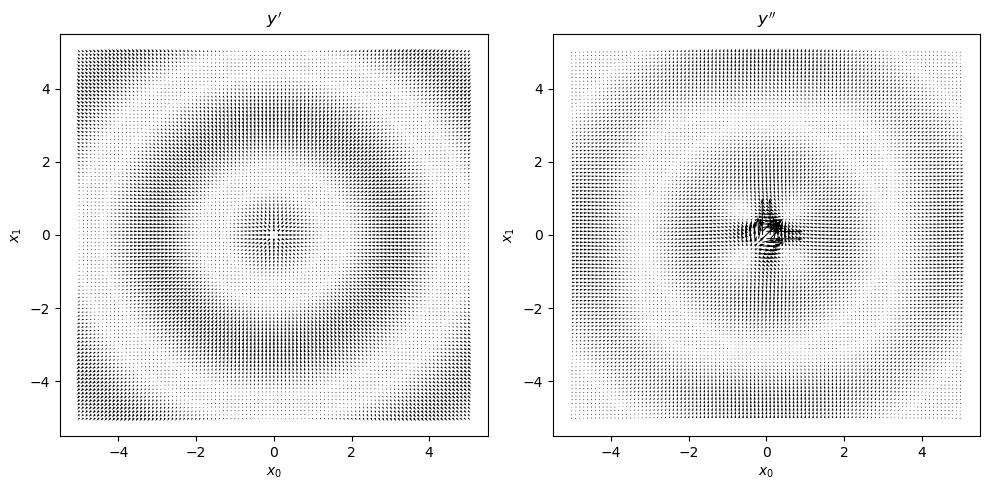

In [179]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].quiver(_df['x0'], _df['x1'], _df['g10'], _df['g11'])
ax[1].quiver(_df['x0'], _df['x1'], _df['g20'], _df['g21'])

ax[0].set_xlabel(r'$x_0$')
ax[0].set_ylabel(r'$x_1$')
ax[1].set_xlabel(r'$x_0$')
ax[1].set_ylabel(r'$x_1$')
ax[0].set_title(r"$y'$")
ax[1].set_title(r"$y''$")

fig.tight_layout()